In this notebook I train a logistic regression model on the data set "pairs_final_diffed_us.csv". That data is picked form "pairs.csv" and limited to country code US.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
from sklearn.metrics import confusion_matrix

In [4]:
from sklearn.metrics import roc_auc_score

In [5]:
import seaborn as sns

In [6]:
data = pd.read_csv(r"C:\Users\gorma\OneDrive\Documents\Erdos\foursquare-location-matching\tim_code\working_data\pairs_final_diffed_us.csv")

In [7]:
data.columns

Index(['Unnamed: 0', 'theta_diff', 'name_cosines', 'full_address_cosines',
       'categories_cosines', 'match'],
      dtype='object')

In [8]:
data = data.drop('Unnamed: 0', axis =1)

## Inspecting Data Before Modeling

In [9]:
data.head()

,theta_diff,name_cosines,full_address_cosines,categories_cosines,match
0,0.000002,0.707107,0.612372,1.0,True
1,0.000082,1.000000,0.534522,-1.0,True
2,0.000019,1.000000,1.000000,1.0,True
3,0.000253,0.816497,1.000000,0.0,False
4,0.000119,0.000000,0.566947,1.0,True


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117793 entries, 0 to 117792
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   theta_diff            117793 non-null  float64
 1   name_cosines          117793 non-null  float64
 2   full_address_cosines  117793 non-null  float64
 3   categories_cosines    117793 non-null  float64
 4   match                 117793 non-null  bool   
dtypes: bool(1), float64(4)
memory usage: 3.7 MB


In [11]:
x_col = ['theta_diff', 'name_cosines', 'full_address_cosines', 'categories_cosines']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(data[x_col], data['match'],
                                                    shuffle = True,
                                                    random_state = 614,
                                                   test_size = 0.2,
                                                   stratify = data['match'])

## Calculating True/False Ratio

In [13]:
len(y_train[y_train == True])/len(y_train[y_train == False])

2.55667107001321

In [14]:
len(y_train[y_train == True])/len(y_train)

0.7188382112613282

## Modeling the Unscaled Data

In [15]:
lreg = LogisticRegression()

In [16]:
lreg.fit(x_train, y_train)

LogisticRegression()

In [17]:
y_pred = lreg.predict(x_test)

In [18]:
y_pred

array([ True, False,  True, ...,  True,  True,  True])

In [19]:
confusion_matrix(y_test, y_pred)

array([[ 1813,  4811],
       [ 1391, 15544]], dtype=int64)

In [20]:
roc_auc_score(y_test, y_pred)

0.5957820529689393

In [22]:
len(y_pred)/len(y_test)

1.0

## Modeling the Scaled Data

In [71]:
data_scaled = pd.read_csv(r"C:\Users\gorma\OneDrive\Documents\Erdos\foursquare-location-matching\tim_code\working_data\pairs_final_diffed_us_scaled.csv")

In [72]:
data_scaled.head()

,theta_diff,name_cosines,full_address_cosines,categories_cosines,match
0,-0.061868,0.161665,-0.777427,0.862956,True
1,-0.059115,0.976815,-1.134436,-2.381617,True
2,-0.061307,0.976815,1.000179,0.862956,True
3,-0.053227,0.466107,1.000179,-0.759330,False
4,-0.057843,-1.806282,-0.985743,0.862956,True


In [73]:
x_train, x_test, y_train, y_test = train_test_split(data_scaled[x_col], data_scaled['match'],
                                                    shuffle = True,
                                                    random_state = 614,
                                                   test_size = 0.2,
                                                   stratify = data['match'])
lreg = LogisticRegression()
lreg.fit(x_train, y_train)
y_pred = lreg.predict(x_test)

In [74]:
y_train

33881     False
39408      True
19590      True
12786      True
107603     True
          ...  
1236       True
83095      True
56642      True
58504      True
25316      True
Name: match, Length: 94234, dtype: bool

In [75]:
y_test

112604     True
78308     False
104041     True
28064      True
48531      True
          ...  
67177     False
79470      True
90036     False
22007     False
30357      True
Name: match, Length: 23559, dtype: bool

In [26]:
confusion_matrix(y_test, y_pred)

array([[ 1814,  4810],
       [ 1391, 15544]], dtype=int64)

In [27]:
roc_auc_score(y_test, y_pred)

0.5958575360607267

So scaling didn't do much

## Now Playing with threshold of scaled data

In [76]:
x_train

,theta_diff,name_cosines,full_address_cosines,categories_cosines
33881,-0.061077,-0.088517,1.000179,0.862956
39408,-0.061874,0.976815,1.000179,0.565261
19590,-0.033238,0.976815,1.000179,0.862956
12786,-0.061287,0.466107,0.158658,-0.759330
107603,-0.060546,0.466107,1.000179,0.862956
...,...,...,...,...
1236,-0.061600,-1.806282,1.000179,0.862956
83095,-0.061953,0.976815,0.426946,-0.759330
56642,-0.061953,-1.062468,1.000179,0.177297
58504,-0.058875,0.466107,-0.342989,-0.759330


In [83]:
cutoffs = np.arange(0, 1.01, 0.01)
y_train_prob = lreg.predict_proba(x_train)[:,1]


In [84]:
y_train_prob

array([0.8184904 , 0.88956771, 0.89773425, ..., 0.66976725, 0.74153182,
       0.77922105])

In [89]:
accs = []
aucs = []
for cutoff in cutoffs:
    cutoffs = np.arange(0, 1.01, 0.01)
    y_train_pred = 1*(y_train_prob >= cutoff)
    
    accs.append(np.sum(y_train_pred == y_train)/len(y_train))
    aucs.append(roc_auc_score(y_train, y_train_pred))

In [87]:
import matplotlib.pyplot as plt

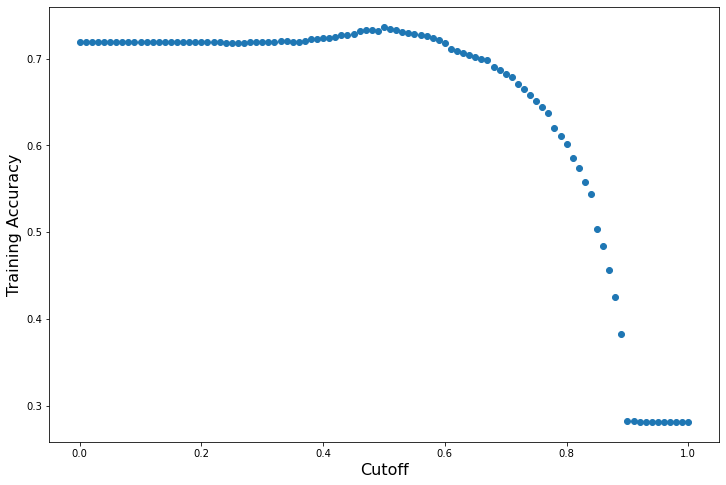

In [88]:
plt.figure(figsize=(12,8))

plt.scatter(cutoffs,accs)

plt.xlabel("Cutoff",fontsize=16)
plt.ylabel("Training Accuracy",fontsize=16)

plt.show()

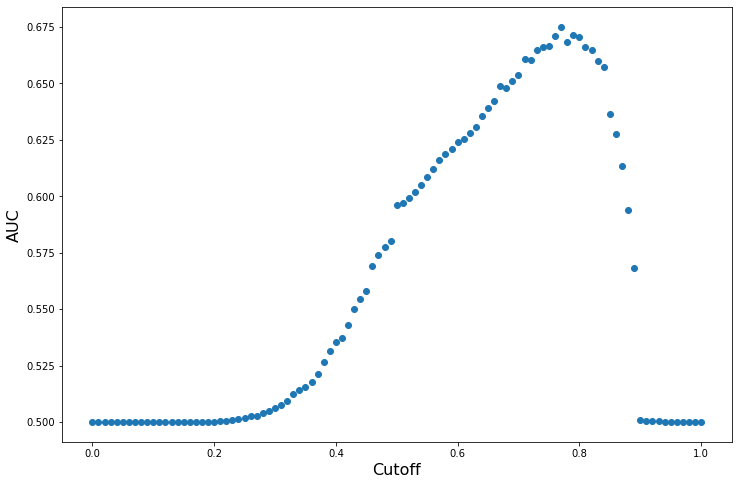

In [90]:
plt.figure(figsize=(12,8))

plt.scatter(cutoffs,aucs)

plt.xlabel("Cutoff",fontsize=16)
plt.ylabel("AUC",fontsize=16)

plt.show()

# A Naive Model

In [57]:
sample_arr = [True, False]

naive_pred = np.random.choice(sample_arr, len(y_test))

In [58]:
confusion_matrix(y_test, naive_pred)

array([[3392, 3232],
       [8519, 8416]], dtype=int64)

In [59]:
roc_auc_score(y_test, naive_pred)

0.5045181277091009

In [60]:
sample_arr = [True]

naive_pred = np.random.choice(sample_arr, len(y_test))

In [61]:
naive_pred

array([ True,  True,  True, ...,  True,  True,  True])

In [62]:
confusion_matrix(y_test, naive_pred)

array([[    0,  6624],
       [    0, 16935]], dtype=int64)

In [63]:
roc_auc_score(y_test, naive_pred)

0.5

In [64]:
len(y_test)

23559